# Huggingface

Dans le notebook précédent, nous avons vu comment un transformer peut-être créé et modifié directement avec PyTorch.
On aurait également pu aller un pas plus loin et implémenter le modèle nous même avec PyTorch.
C'est un exercice intéressant, mais qui demande un peu plus de temps que ce que nous avons dans les TPs.
Ceci dit, je vous encourage à consulter des ressources en ligne à ce sujet si ça vous intéresse.

Aujourd'hui, nous explorerons plutôt [_huggingface_](https://huggingface.co/).
Huggingface est un peu comme un GitHub pour les modèles d'IA.
Les utilisateurs peuvent publier l'architecture de leur modèle, des poids pré-entraînés et des ensembles de données.
Le site fourni aussi des librairies implémentant certains communs, notamment des [transformers](https://huggingface.co/docs/transformers/index) et des [modèles de diffusion](https://huggingface.co/docs/diffusers/index).
Voir la section [documentation](https://huggingface.co/docs) pour plus de détails.
Dans ce notebook, nous allons nous familiariser avec la librairie [transformers](https://huggingface.co/docs/transformers/index).

La librairie `transformers` va un peu dans la direction opposée d'une implémentation complète en PyTorch: presque toutes les opérations sont cachées derrières des classes nous permettant simplement de spécifier les paramètres de notre modèle.
Ce n'est pas la meilleure façon de comprendre tous les détails d'un modèle, mais c'est pratique pour le tester rapidement et comprendre comment il interprète les données.
De plus, tous les modèles de la librairie sont disponible [sur GitHub](https://github.com/huggingface/transformers/tree/main/src/transformers/models).
N'hésitez pas à les consulter!

## Installation

Pour utiliser `transformers`, il faudra d'abord l'installer. Nous installerons du même coup les autres librries huggingface utilisées dans ce TP.

In [3]:
INSTALL = False
if INSTALL:
    !python -m pip -q install transformers datasets evaluate
else:
    print("Skip install")

Skip install


Si vous n'avez pas de GPU, vous pouvez remplacer `transformers` par `transformers[torch]`.

## Connexion

L'accès à certains modèles Huggingface requiert un compte et une authentification.
Pour se connecter, on peut utiliser `notebook_login()` dans un notebook et `login()` dans un terminal

In [4]:
def is_notebook() -> bool:
    # https://stackoverflow.com/questions/15411967/how-can-i-check-if-code-is-executed-in-the-ipython-notebook
    try:
        shell = get_ipython().__class__.__name__ 
        if shell == 'ZMQInteractiveShell':
            return True   # Jupyter notebook or qtconsole
        elif shell == 'TerminalInteractiveShell':
            return False  # Terminal running IPython
        else:
            return False  # Other type (?)
    except NameError:
        return False      # Probably standard Python interpreter

NOTEBOOK = is_notebook()

In [5]:
from huggingface_hub import notebook_login, login

if NOTEBOOK:
    notebook_login()
else:
    login()

## Pipelines

L'interface la plus simple de `transformers` est la classe `Pipeline`.
Celle-ci nous permet d'importer et d'utiliser un transformeur en trois lignes de code!

### Génération de texte

Bien que ce ne soit pas de l'analyse de données physique, la génération de texte est tellement omni-présente dans les dernières années qu'il peut être intéressant de voir comment l'appliquer avec Huggingfance.

In [6]:
from transformers import pipeline

messages = [
    [
        {
            "role": "system",
            "content": [{"type": "text", "text": "You are a helpful assistant."},]
        },
        {
            "role": "user",
            "content": [{"type": "text", "text": "What is Markov Chain Monte Carlo"},]
        },
    ],
]

txt_pipeline = pipeline(task="text-generation", model="google/gemma-3-1b-it")
# txt_pipeline = pipeline(task="text-generation")

Device set to use cpu


In [7]:
messages = [
    [
        {
            "role": "system",
            "content": [{"type": "text", "text": "You are a helpful assistant."},]
        },
        {
            "role": "user",
            "content": [{"type": "text", "text": "What is Markov Chain Monte Carlo? Explain in two sentences."},]
        },
    ],
]
# messages = "Markov Chain Monte Carlo is an inference method that"

In [8]:
simple = isinstance(messages, str)
reply = txt_pipeline(messages, max_new_tokens=100)
if simple:
    print(reply[0]["generated_text"])
else:
    print(reply[0][0]["generated_text"][2]["content"])

Markov Chain Monte Carlo (MCMC) is a powerful statistical technique used to approximate complex probability distributions by repeatedly drawing samples from a Markov Chain. It’s particularly useful for Bayesian inference and simulations where exact solutions are difficult to obtain.


In [9]:
del txt_pipeline

### Classification d'image

L'interface `pipeline` ne se limite bien sûr pas à la génération de texte.
On peut spécifier une autre tâche via le premier argument, `task`.
Par exemple, pour classifier des images on utiliserait `task="image-classification"`.
Le modèle par défaut est le transformeur visuel `vit` avec des sous-images de 16 et une taille initiale de 224x224 pixels.
On spécifie l'argument `model` ci-dessous pour clarifier le modèle utilisé.

In [10]:
img_pipeline = pipeline(task="image-classification", model="google/vit-base-patch16-224")

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cpu


In [11]:
# Chat
preds = img_pipeline("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg")
preds

[{'label': 'lynx, catamount', 'score': 0.433500736951828},
 {'label': 'cougar, puma, catamount, mountain lion, painter, panther, Felis concolor',
  'score': 0.03479614108800888},
 {'label': 'snow leopard, ounce, Panthera uncia',
  'score': 0.03240189701318741},
 {'label': 'Egyptian cat', 'score': 0.02394474856555462},
 {'label': 'tiger cat', 'score': 0.02288917638361454}]

In [12]:
# Mtl Bagel
img_pipeline("https://upload.wikimedia.org/wikipedia/commons/8/8c/Bagels-Montreal-REAL.jpg")

[{'label': 'bagel, beigel', 'score': 0.9995812773704529},
 {'label': 'pretzel', 'score': 9.010692883748561e-05},
 {'label': 'French loaf', 'score': 2.8125032258685678e-05},
 {'label': 'dough', 'score': 1.450583204132272e-05},
 {'label': 'cheeseburger', 'score': 9.91705383057706e-06}]

In [13]:
# NY Bagel
img_pipeline("https://zenaskitchen.com/wp-content/uploads/2024/03/new-york-style-bagels.jpg")

[{'label': 'bagel, beigel', 'score': 0.9990509152412415},
 {'label': 'pretzel', 'score': 0.0005187250208109617},
 {'label': 'French loaf', 'score': 4.190807885606773e-05},
 {'label': 'bakery, bakeshop, bakehouse', 'score': 3.944656054954976e-05},
 {'label': 'dough', 'score': 1.119350599765312e-05}]

In [14]:
# Space shuttle
img_pipeline("https://encrypted-tbn1.gstatic.com/images?q=tbn:ANd9GcT8fYspmvzBIMbRW4eXMT65SVOej_SMq3WqTSXkc5uEvF9OX6XQBs5ilx2qzWZa8_VkwzG82u4C6_4KenH9wc8ZAmzNFri0WzRmdfHqY_w")

[{'label': 'space shuttle', 'score': 0.9997312426567078},
 {'label': 'missile', 'score': 1.2249620340298861e-05},
 {'label': 'projectile, missile', 'score': 7.796461432008073e-06},
 {'label': 'minibus', 'score': 2.9817892936989665e-06},
 {'label': 'airliner', 'score': 2.457976961522945e-06}]

In [15]:
# Galaxie
img_pipeline("https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/NGC_4414_%28NASA-med%29.jpg/620px-NGC_4414_%28NASA-med%29.jpg")

[{'label': 'coil, spiral, volute, whorl, helix', 'score': 0.15451540052890778},
 {'label': 'planetarium', 'score': 0.053370244801044464},
 {'label': 'shield, buckler', 'score': 0.03303421661257744},
 {'label': 'wok', 'score': 0.009142440743744373},
 {'label': 'maze, labyrinth', 'score': 0.0071629928424954414}]

In [16]:
del img_pipeline

## Interface complète

Le `pipeline` ci-dessus nous permet de tester un modèle très rapidement, mais ne permet pas d'interagir avec un ensemble de données ou d'entraîner le modèle.

### Importation des données

Comme avec PyTorch, huggingface comprends plusieurs ensembles de données.
Pour y accéder, on peut utiliser la librairie [Datasets](https://huggingface.co/docs/datasets/index).

Ici, on importe seulement les 5000 premiers exemples des données d'entraînement pour réduire la taille des fichiers sur notre disque.
On pourra créer nos propre sous-ensembles à partir des données d'entraînement uniquement.

In [17]:
from datasets import load_dataset

data = load_dataset("food101", split="train[:5000]")
data

Dataset({
    features: ['image', 'label'],
    num_rows: 5000
})

On voit que les données contiennent des images et leurs annotation.
Séparons maintenant le tout avec 80% des exemples utilisés dans l'entraînement et le dernier 20% utilisé pour la validation.

In [18]:
# TODO: Split train/test objects?
data = data.train_test_split(test_size=0.2)
data

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 4000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 1000
    })
})

Voyons voir de quoi a l'air un exemple:

In [19]:
data["train"][0]

{'image': <PIL.Image.Image image mode=RGB size=512x512>, 'label': 77}

On voit que:

- Contrairement à PyTorch, qui nous donne des tuples, on a ici un dictionnaire.
- L'image est au format PIL, que nous avons vu plus tôt dans le cours
- L'annotation est un nombre entier, comme avec PyTorch

L'attribut `features` des données nous permet cependant d'accéder à un peu plus de détail sur les données

In [20]:
test_num = 53
test_name = "steak"
labels = data["train"].features["label"]
print("Labels", labels)
print("Number of classes", labels.num_classes)
print(f"Class {test_num}", labels.int2str(test_num))
print(f"Class int for {test_name}", labels.str2int(test_name))

Labels ClassLabel(names=['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake', 'cheese_plate', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese

In [21]:
label2id, id2label = dict(), dict()
for name in labels.names:
    i = labels.str2int(name)
    label2id[name] = i
    id2label[i] = name

Image format: RGB (512, 384)


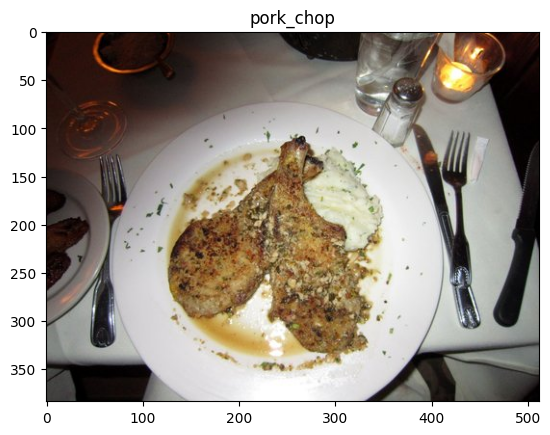

In [22]:
import matplotlib.pyplot as plt
import numpy as np


rng = np.random.default_rng()

i = int(rng.integers(len(data["train"])))
eg = data["train"][i]
img, label = eg["image"], eg["label"]
print("Image format:", img.mode, img.size)

plt.imshow(img)
plt.title(id2label[label])
plt.show()

### Préparation des données

Comme avec PyTorch, il faut transformer les données de PIL vers des tenseurs.
Pour ce faire, Hugginface inclut des classes de type `Preprocessor`.
On peut utiliser le pre-processeur d'un modèle pré-entraîné, par exemple ViT entraîné sur les données ImageNet-21K.

In [23]:
from transformers import AutoImageProcessor

checkpoint = "google/vit-base-patch16-224-in21k"
image_processor = AutoImageProcessor.from_pretrained(checkpoint)
image_processor

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


ViTImageProcessor {
  "do_convert_rgb": null,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

In [24]:
from torchvision.transforms import ToTensor, Compose, Resize, Normalize
normalize = Normalize(mean=image_processor.image_mean, std=image_processor.image_std)
size = (
    image_processor.size["shortest_edge"]
    if "shortest_edge" in image_processor.size
    else (image_processor.size["height"], image_processor.size["width"])
)
torch_transforms = Compose([
    Resize(size),
    ToTensor(),
    normalize,
])
def transforms(examples):
    examples["pixel_values"] = [torch_transforms(img.convert("RGB")) for img in examples["image"]]
    del examples["image"]
    return examples
data = data.with_transform(transforms)

In [25]:
data["train"][0]

{'label': 77,
 'pixel_values': tensor([[[-0.0353, -0.0431, -0.0667,  ..., -0.0902, -0.0902, -0.0902],
          [-0.0667, -0.0588, -0.0667,  ..., -0.0824, -0.0824, -0.0902],
          [-0.0745, -0.0667, -0.0902,  ..., -0.0824, -0.0745, -0.0902],
          ...,
          [ 0.7647,  0.7725,  0.7804,  ...,  0.7569,  0.7333,  0.6941],
          [ 0.7569,  0.7569,  0.7490,  ...,  0.7490,  0.7098,  0.6392],
          [ 0.7569,  0.7490,  0.7412,  ...,  0.6863,  0.6471,  0.5529]],
 
         [[-0.6706, -0.6863, -0.6941,  ..., -0.7569, -0.7569, -0.7569],
          [-0.6863, -0.6784, -0.6784,  ..., -0.7490, -0.7490, -0.7569],
          [-0.6706, -0.6627, -0.6863,  ..., -0.7490, -0.7412, -0.7569],
          ...,
          [ 0.6235,  0.6314,  0.6314,  ...,  0.3961,  0.3647,  0.3098],
          [ 0.6157,  0.6157,  0.6078,  ...,  0.3725,  0.3176,  0.2392],
          [ 0.6157,  0.6078,  0.5922,  ...,  0.2941,  0.2392,  0.1451]],
 
         [[-0.8588, -0.8745, -0.8902,  ..., -0.9137, -0.9137, -0.9137]

In [26]:
from transformers import DefaultDataCollator

data_collator = DefaultDataCollator()

### Création du modèle

Plus haut, nous avons importé notre modèle via un `pipeline`.
Ici, nous allons plutôt importer le modèle directement.
Nous utiliserons tout de même un modèle pré-entraîné.

In [27]:
from transformers import AutoModelForImageClassification

model = AutoModelForImageClassification.from_pretrained(
    checkpoint,
)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


L'avertissement ci-dessus nous indique que bien que le modèle soit pré-entraîné, son classificateur (la dernière couche) n'est pas entraîné.
Il faudra donc ajuster les poids et biais à la tâche qui nous intéresse ici.
Par contre, tout le reste du modèle est pré-entraîné.

Voyons voir de quoi est fait le modèle.

In [28]:
model

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_features=3072, bias=True)
            (intermed

Remarquez que la structure générale est la même que celle vue en clase:

- Un encodage des images et la position
- Un dropout optionnel
- Un encodeur, composé ici de 12 blocs ViT, qui eux contiennent:
  - Une couche d'attention
  - Une connection résiduelle
  - Une couche pleinement connectée
  - Des normalisations de couche (`LayerNorm`)
- Une classificateur permettant de convertir la sortie la sortie du classificateur en score pour chaque catégorie

Par défaut, le modèle contient uniquement deux sorties.
Il faut l'initialiser avec le bon nombre de classes.
On peut également utiliser la conversion entre les numéros de classes et leur nom.

In [29]:
model = AutoModelForImageClassification.from_pretrained(
    checkpoint,
    num_labels=len(labels.names),
    id2label=id2label,
    label2id=label2id,
)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [30]:
model

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_features=3072, bias=True)
            (intermed

### Entraînement

#### Métrique d'évaluation

<https://huggingface.co/evaluate-metric>
<https://huggingface.co/docs/evaluate/index>

In [31]:
import evaluate

accuracy = evaluate.load("accuracy")

In [32]:
accuracy

EvaluationModule(name: "accuracy", module_type: "metric", features: {'predictions': Value(dtype='int32', id=None), 'references': Value(dtype='int32', id=None)}, usage: """
Args:
    predictions (`list` of `int`): Predicted labels.
    references (`list` of `int`): Ground truth labels.
    normalize (`boolean`): If set to False, returns the number of correctly classified samples. Otherwise, returns the fraction of correctly classified samples. Defaults to True.
    sample_weight (`list` of `float`): Sample weights Defaults to None.

Returns:
    accuracy (`float` or `int`): Accuracy score. Minimum possible value is 0. Maximum possible value is 1.0, or the number of examples input, if `normalize` is set to `True`.. A higher score means higher accuracy.

Examples:

    Example 1-A simple example
        >>> accuracy_metric = evaluate.load("accuracy")
        >>> results = accuracy_metric.compute(references=[0, 1, 2, 0, 1, 2], predictions=[0, 1, 1, 2, 1, 0])
        >>> print(results)
    

In [33]:
def compute_metrics(eval_pred):
    preds, labels = eval_pred
    preds = np.argmax(preds, axis=1)
    return accuracy.compute(predictions=preds, references=labels)

#### Boucle d'entraînement

In [34]:
from transformers import TrainingArguments, Trainer

In [35]:
training_args = TrainingArguments(
    output_dir="new_model",
    remove_unused_columns=False,
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=16,
    gradient_accumulation_steps=4,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    warmup_ratio=0.1,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
)

In [36]:
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=data["train"],
    eval_dataset=data["test"],
    processing_class=image_processor,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.train()